# Imports

In [1]:
import datacomp as dc

# Data setup

In [2]:
# load Data
datacol = dc.get_data("simulated.csv", ["Dataset1", "Dataset2", "Dataset3"], ["CATSIG1", "CATNON2"], "DATASET")

# compare only baseline data
datacol.reduce_dfs_to_value("TIME", 0)

# exlude following features from comparison
exclude_feats = ["TIME", "DATASET", "ENTITY"]

# columns storing strings; for clustering
str_cols=["CATSIG1"]

# Visualize feature overlap

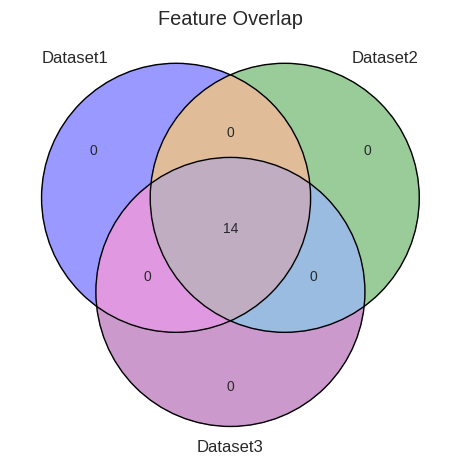

In [3]:
datacol.feat_venn_diagram()

# Statistical comparison

In [4]:
# sorting by index because by default the resulting dataframe will be sorted 
# based on signficance. This can be hard to read if multiple datasets are 
# involved
results = datacol.analyze_feature_ranges(exclude=exclude_feats).sort_index()
results

Fraction of significantly deviating features: 21/33


pv        cor_pv  signf
BATCH1  (1, 2)   1.978793e-01  7.863623e-01  False
        (1, 3)   5.726642e-69  0.000000e+00   True
        (2, 3)   1.411606e-72  0.000000e+00   True
BATCH2  (1, 2)   5.801593e-01  9.758964e-01  False
        (1, 3)   1.331104e-53  0.000000e+00   True
        (2, 3)   5.929016e-52  0.000000e+00   True
CATNON2 (1, 2)   7.925706e-01  9.758964e-01  False
        (1, 3)   9.258963e-03  9.726211e-02  False
        (2, 3)   5.145221e-03  6.002504e-02  False
CATSIG1 (1, 2)   1.671636e-50  0.000000e+00   True
        (1, 3)  2.130191e-302  0.000000e+00   True
        (2, 3)   8.105434e-93  0.000000e+00   True
CHIFEAT (1, 2)   2.802695e-11  5.325114e-10   True
        (1, 3)   4.177381e-22  0.000000e+00   True
        (2, 3)   1.816630e-05  3.087822e-04   True
FEAT1   (1, 2)   4.351614e-05  6.525434e-04   True
        (1, 3)   1.178741e-08  2.121734e-07   True
        (2, 3)   1.055483e-01  5.903102e-01  False
LONG1   (1, 2)   1.121025e-02  1.066132e-01  False
        (1, 3)   8.356302e-02  5.440435e-01  False
        (2, 3)   2.827186e-05  4.522539e-04   True
NDNON1  (1, 2)   8.711269e-01  9.758964e-01  False
        (1, 3)   4.168444e-01  9.606716e-01  False
        (2, 3)   5.253033e-01  9.758964e-01  False
NDNON2  (1, 2)   2.635869e-03  3.372957e-02   True
        (1, 3)   6.520678e-01  9.758964e-01  False
        (2, 3)   1.238731e-03  1.720329e-02   True
NDSIG1  (1, 2)   7.438311e-14  1.487699e-12   True
        (1, 3)   1.511385e-58  0.000000e+00   True
        (2, 3)   4.987203e-37  0.000000e+00   True
NDSIG2  (1, 2)   2.937943e-77  0.000000e+00   True
        (1, 3)   1.354732e-72  0.000000e+00   True
        (2, 3)   4.705565e-72  0.000000e+00   True

# Visualization of significant deviations

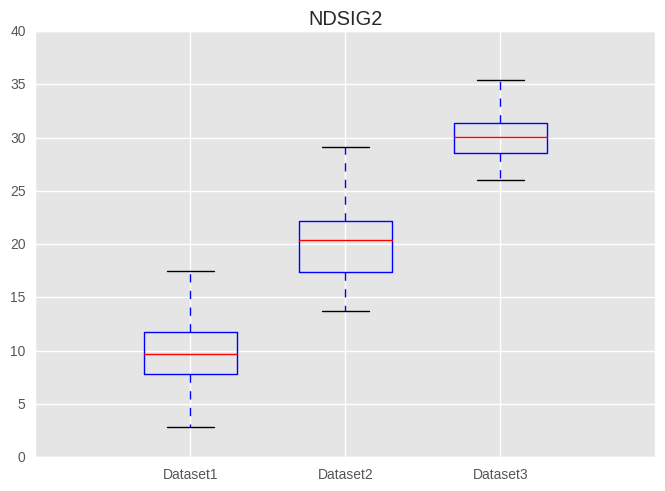

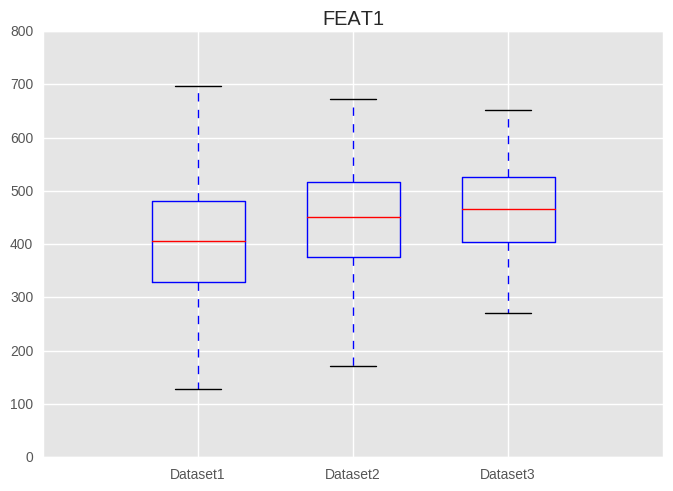

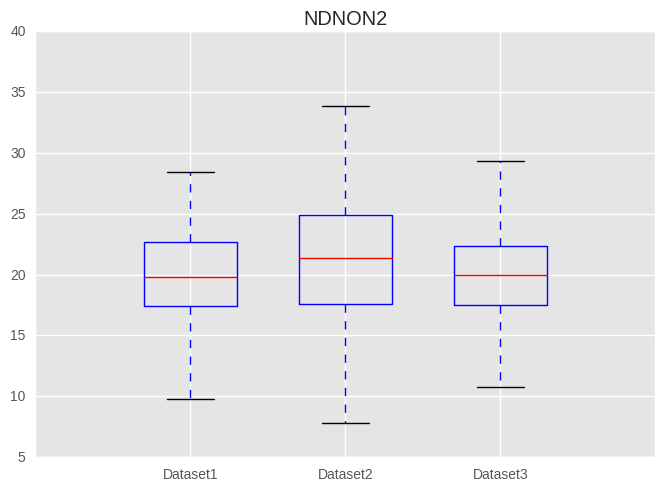

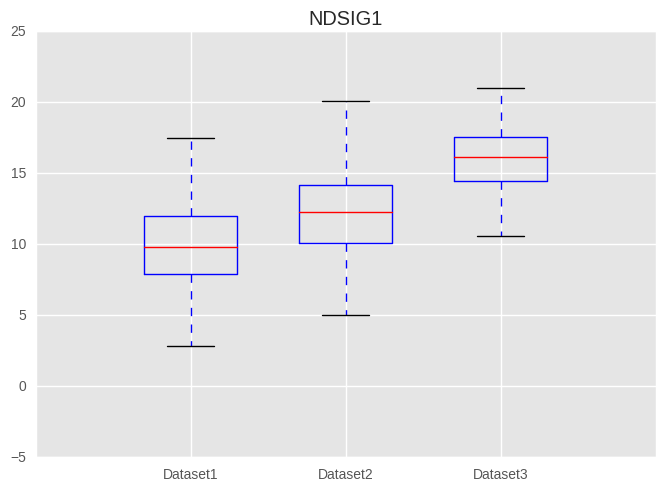

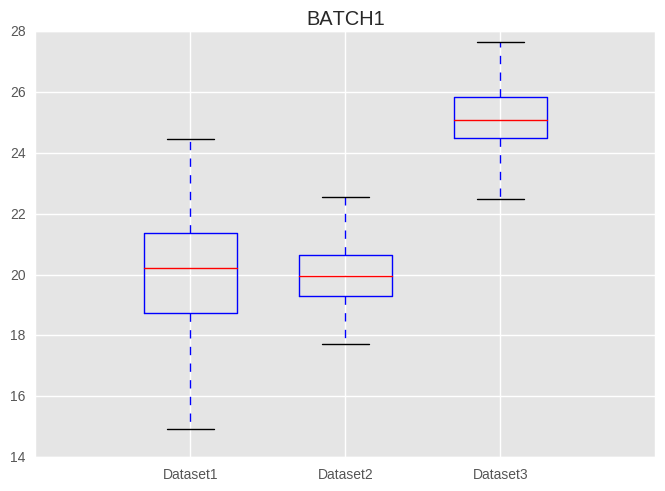

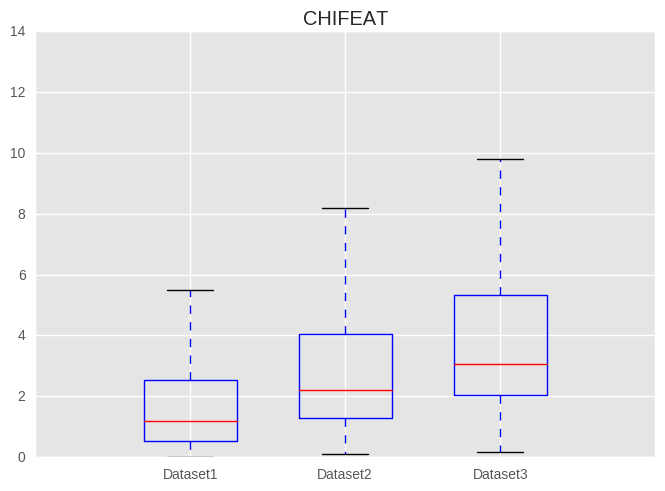

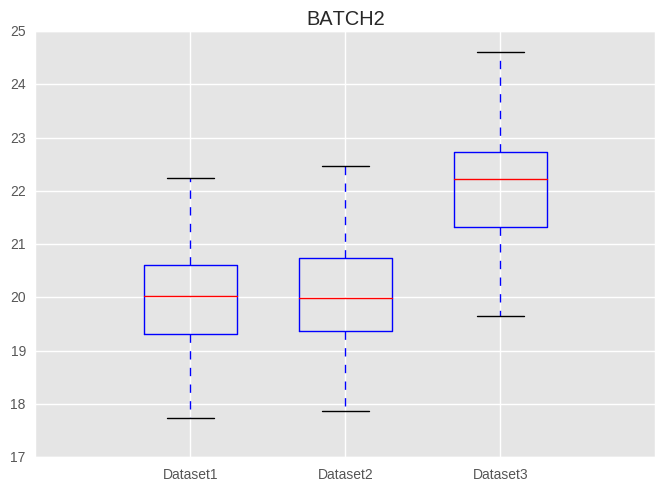

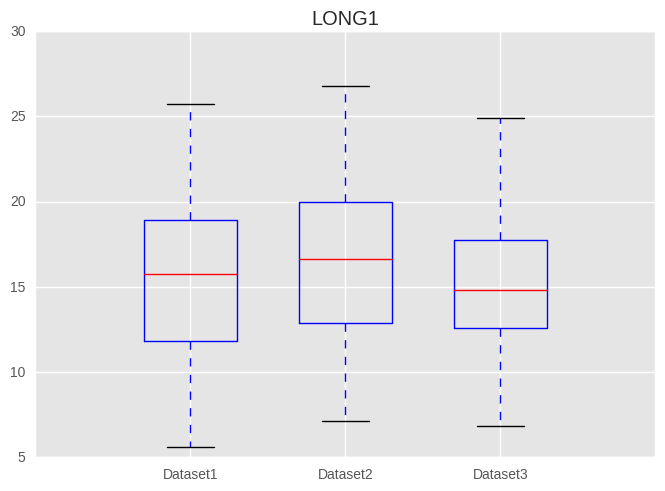

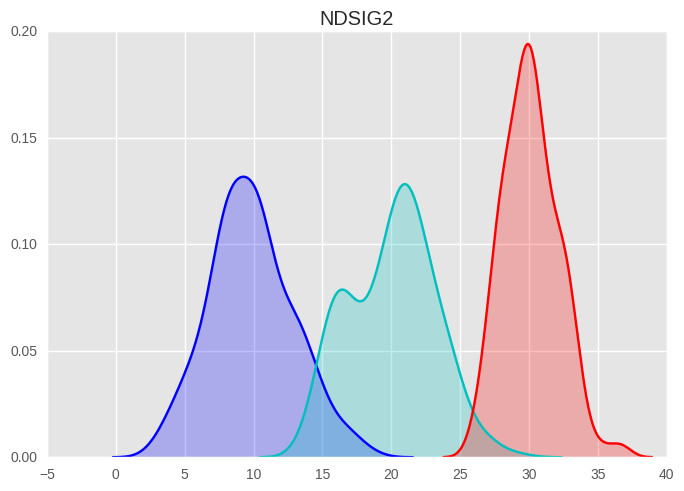

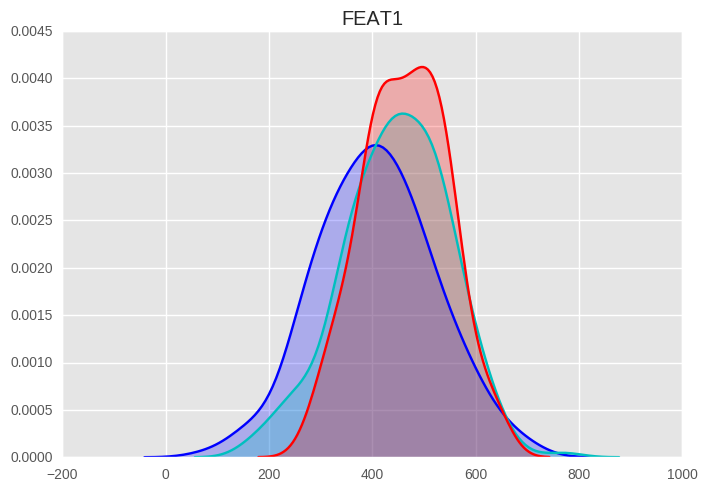

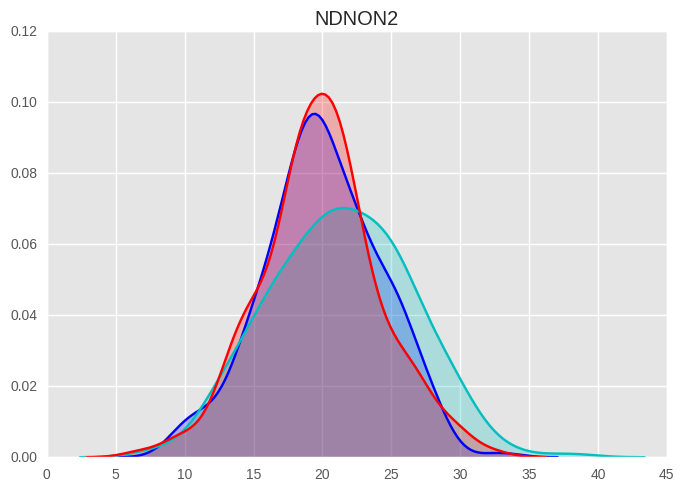

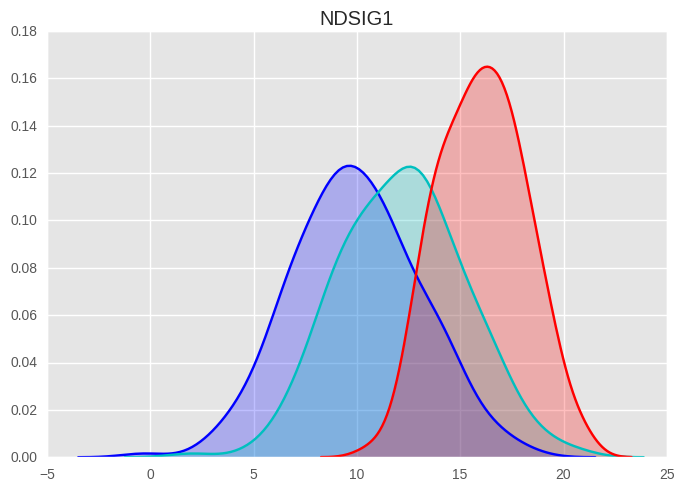

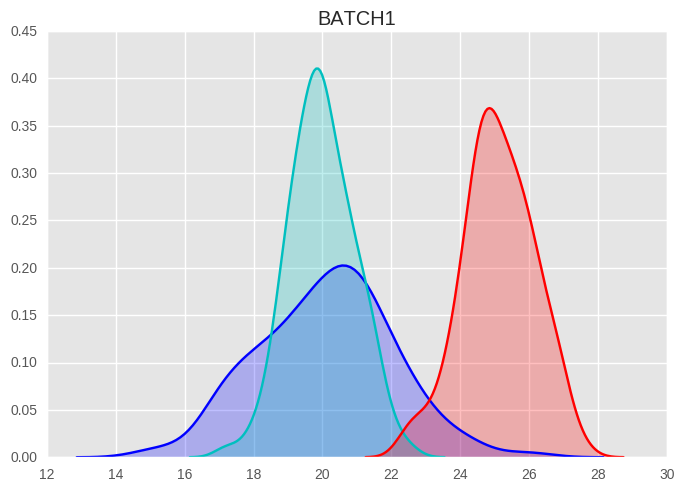

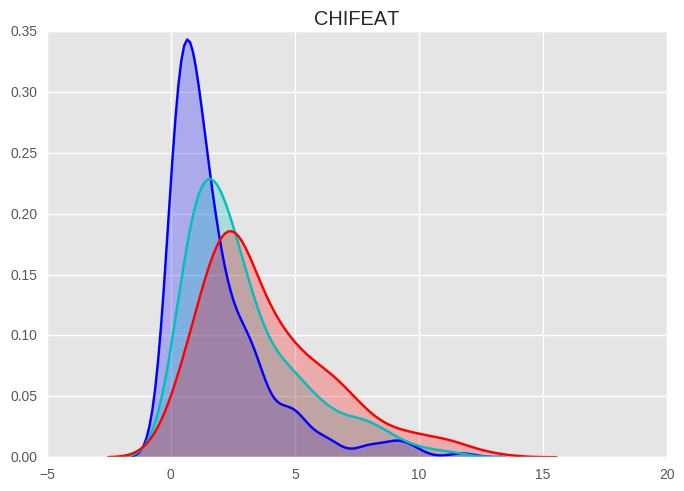

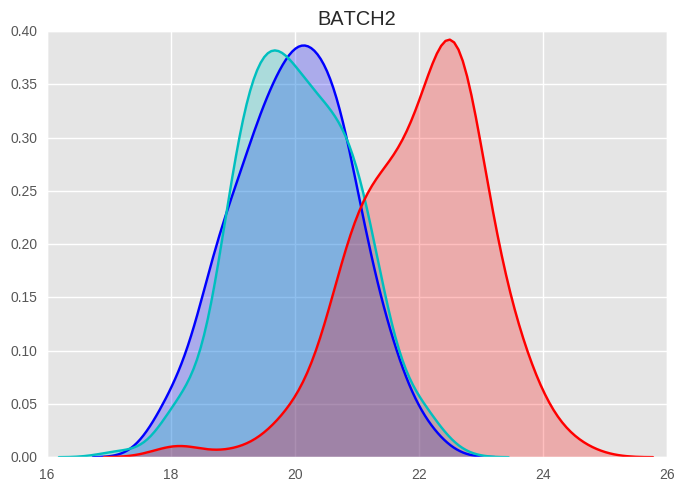

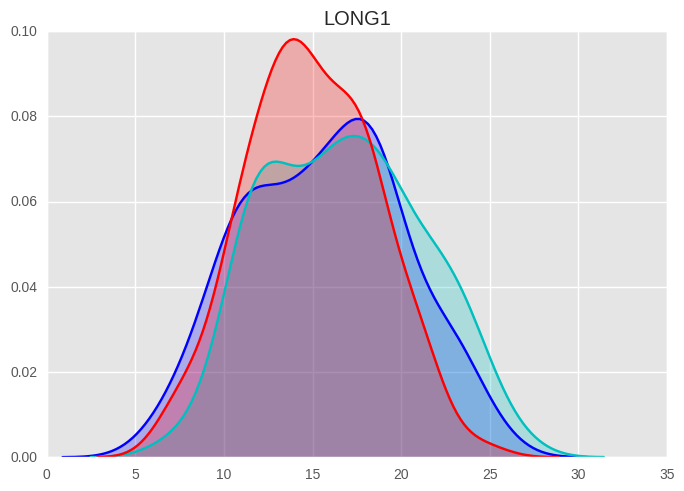

In [5]:
dc.plot_sig_num_feats(datacol, results)

# MANOVA

In [6]:
dc.manova(datacol, "DATASET", ["NDNON1", "NDNON2", "BATCH2"])

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Multivariate linear model
==================================================================
                                                                  
------------------------------------------------------------------
       Intercept         Value   Num DF  Den DF   F Value   Pr > F
------------------------------------------------------------------
          Wilks' lambda   0.0039 3.0000 674.0000 57509.3844 0.0000
         Pillai's trace   0.9961 3.0000 674.0000 57509.3844 0.0000
 Hotelling-Lawley trace 255.9765 3.0000 674.0000 57509.3844 0.0000
    Roy's greatest root 255.9765 3.0000 674.0000 57509.3844 0.0000
------------------------------------------------------------------
                                                                  
-------------------------------------------------------------------
         DATASET          Value   Num DF   Den DF   F Value  Pr > F
-------------------------------------------------------------------
           Wilks' lambda  0.8761  3.0000  674.0000  31.7846  0.0000
          Pillai's trace  0.1239  3.0000  674.0000  31.7846  0.0000
  Hotelling-Lawley trace  0.1415  3.0000  674.0000  31.7846  0.0000
     Roy's greatest root  0.1415  3.0000  674.0000  31.7846  0.0000
==================================================================

"""

# Clustering

In [7]:
purity, confusion_m = datacol.hierarchical_clustering(str_cols=str_cols)
print("Cluster purity:", purity)
confusion_m

Cluster purity: 0.421828908555


,0,1,2
4,121,42,77
5,112,88,40
6,120,64,14
